In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from heartpredictions.Tree.utils import fit_and_predict

# Data location

In [4]:
data_path = "../data/clean_data.csv"
save_directory = "current_accuracies/decision_tree/decision_tree_saves"

# Load data

In [5]:
df = pd.read_csv(data_path)

In [6]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448.0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,2448.0,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.794,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,6238.0,0.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,6238.0,0.0,260.0,52.0,105.0,70.0,0.0,0.0,29.430,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,6238.0,0.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.170,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11623,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.740,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11624,9999312.0,0.0,196.0,39.0,133.0,86.0,1.0,30.0,20.910,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
11625,9999312.0,0.0,240.0,46.0,138.0,79.0,1.0,20.0,26.390,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


In [7]:
df.shape

(11627, 39)

In [8]:
df['HDLC']

0        45.0
1        31.0
2        45.0
3        45.0
4        54.0
         ... 
11622    52.0
11623    30.0
11624    52.0
11625    52.0
11626    52.0
Name: HDLC, Length: 11627, dtype: float64

In [9]:
(df.columns)

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [10]:
df.iloc[:, 1: 23].columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC',
       'LDLC'],
      dtype='object')

In [11]:
df.iloc[:, 23: 31].columns

Index(['DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD',
       'HYPERTEN'],
      dtype='object')

In [12]:
print(df.iloc[:, 1: 23].shape[1], df.iloc[:, 23: 31].shape[1])

22 8


# Depth

In [13]:
DEPTH=5

# Train and test

             DEATH              

       Random forest fit        
|--- AGE <= 55.0 
|---|--- SEX = 0.0 
|---|---|--- SYSBP <= 136.0 
|---|---|---|--- CIGPDAY <= 13.0 else  0.0
|---|---|---|---|--- TIME <= 1946.0 value 0.0
|---|---|---|---|---|--- GLUCOSE <= 129.0 value 0.0 else 1.0
|---|---|---|--- TIME <= 2233.0 
|---|---|---|---|--- GLUCOSE <= 125.0 
|---|---|---|---|---|--- PREVSTRK = 0.0 value 0.0 else 1.0
|---|---|---|---|---|--- PREVHYP = 0.0 value 0.0 else 1.0
|---|---|---|---|--- HEARTRTE <= 97.0 
|---|---|---|---|---|--- GLUCOSE <= 207.0 value 0.0 else 1.0
|---|---|---|---|---|--- TIME <= 4397.0 value 0.0 else 1.0
|---|---|--- TIME <= 2165.0 
|---|---|---|--- AGE <= 43.0 value 0.0
|---|---|---|---|--- SYSBP <= 132.0 value 0.0
|---|---|---|---|---|--- PREVCHD = 0.0 value 0.0 else 1.0
|---|---|---|--- HEARTRTE <= 92.0 
|---|---|---|---|--- PREVCHD = 0.0 value 0.0
|---|---|---|---|---|--- TIME <= 4393.0 value 0.0 else 1.0
|---|---|---|---|--- TOTCHOL <= 221.0 else  0.0
|---|---|

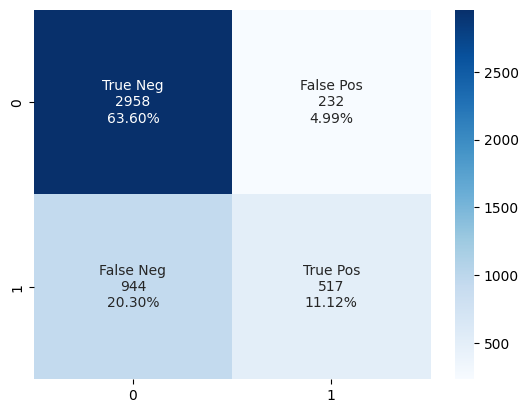

sensitivity : 0.3538672142368241, specificity : 0.9272727272727272, PPV : 0.6902536715620827, NPV : 0.7580727831881087




             ANGINA             

       Random forest fit        
|--- PREVAP = 0.0 else  1.0
|---|--- BMI <= 25.07 
|---|---|--- TOTCHOL <= 192.0 
|---|---|---|--- DIABP <= 105.0 value 0.0
|---|---|---|---|--- SEX = 0.0 value 1.0 else 0.0
|---|---|---|--- BPMEDS = 0.0 
|---|---|---|---|--- SEX = 0.0 else  0.0
|---|---|---|---|---|--- CIGPDAY <= 43.0 value 0.0 else 1.0
|---|---|---|---|--- HDLC <= 47.0 else  0.0
|---|---|---|---|---|--- TOTCHOL <= 285.0 value 0.0 else 1.0
|---|---|--- TOTCHOL <= 223.0 
|---|---|---|--- PREVCHD = 0.0 
|---|---|---|---|--- BMI <= 45.8 value 0.0 else 1.0
|---|---|---|---|--- TOTCHOL <= 219.0 else  1.0
|---|---|---|---|---|--- PREVMI = 0.0 value 1.0 else 0.0
|---|---|---|--- HDLC <= 40.0 
|---|---|---|---|--- BMI <= 34.27 value 0.0
|---|---|---|---|---|--- TOTCHOL <= 279.0 value 0.0 else 1.0
|---|---|---|---|--- GLUCOSE <= 180.0 value

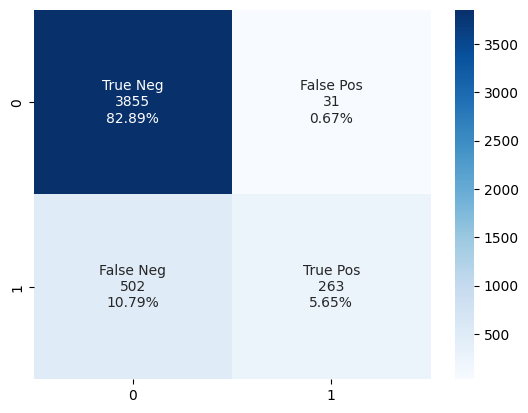

sensitivity : 0.3437908496732026, specificity : 0.9920226453937211, PPV : 0.8945578231292517, NPV : 0.8847831076428735




             HOSPMI             

       Random forest fit        
|--- PREVMI = 0.0 
|---|--- SEX = 0.0 
|---|---|--- SYSBP <= 143.0 
|---|---|---|--- TOTCHOL <= 237.0 value 0.0
|---|---|---|---|--- TOTCHOL <= 430.0 value 0.0 else 1.0
|---|---|---|--- SYSBP <= 187.0 value 0.0
|---|---|---|---|--- HEARTRTE <= 75.0 else  0.0
|---|---|---|---|---|--- AGE <= 50.0 value 1.0 else 0.0
|---|---|--- PREVCHD = 0.0 
|---|---|---|--- TOTCHOL <= 203.0 else  0.0
|---|---|---|---|--- TIME <= 4326.0 value 0.0
|---|---|---|---|---|--- DIABP <= 110.0 value 0.0 else 1.0
|---|---|---|--- TOTCHOL <= 268.0 
|---|---|---|---|--- AGE <= 51.0 else  0.0
|---|---|---|---|---|--- GLUCOSE <= 70.0 value 0.0 else 1.0
|---|---|---|---|--- TOTCHOL <= 294.0 else  0.0
|---|---|---|---|---|--- SYSBP <= 120.0 value 0.0 else 1.0
|---|--- SEX = 0.0 
|---|---|--- SYSBP <= 118.0 value 1.0
|---|---|---|--

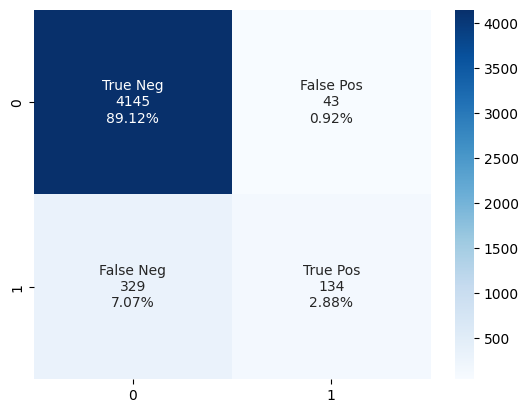

sensitivity : 0.2894168466522678, specificity : 0.9897325692454633, PPV : 0.7570621468926554, NPV : 0.9264640143048726




            MI_FCHD             

       Random forest fit        
|--- PREVCHD = 0.0 
|---|--- SEX = 0.0 
|---|---|--- SYSBP <= 143.0 
|---|---|---|--- TOTCHOL <= 253.0 value 0.0
|---|---|---|---|--- TOTCHOL <= 341.0 value 0.0
|---|---|---|---|---|--- LDLC <= 170.0 value 1.0 else 0.0
|---|---|---|--- SYSBP <= 172.0 else  0.0
|---|---|---|---|--- TOTCHOL <= 290.0 value 0.0
|---|---|---|---|---|--- DIABP <= 70.0 value 1.0 else 0.0
|---|---|--- SYSBP <= 144.0 
|---|---|---|--- TOTCHOL <= 210.0 
|---|---|---|---|--- GLUCOSE <= 175.0 value 0.0 else 1.0
|---|---|---|---|--- TIME <= 2219.0 else  0.0
|---|---|---|---|---|--- GLUCOSE <= 123.0 value 0.0 else 1.0
|---|---|---|--- LDLC <= 124.0 else  0.0
|---|---|---|---|--- TIME <= 4403.0 value 0.0
|---|---|---|---|---|--- TIME <= 4460.0 value 1.0 else 0.0
|---|--- PREVMI = 0.0 
|---|---|--- SEX = 0.0 
|---|---|---|--- DIABP

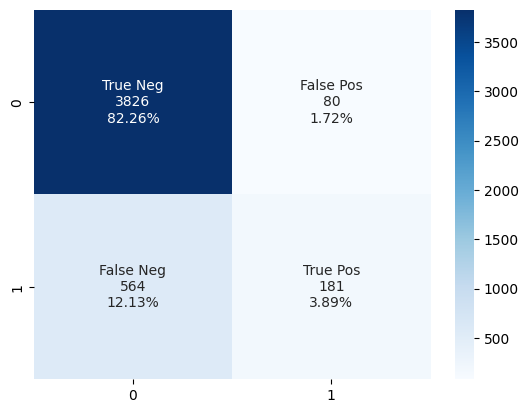

sensitivity : 0.24295302013422818, specificity : 0.9795186891961085, PPV : 0.6934865900383141, NPV : 0.8715261958997722




             ANYCHD             

       Random forest fit        
|--- PREVCHD = 0.0 else  1.0
|---|--- SEX = 0.0 
|---|---|--- SYSBP <= 143.0 
|---|---|---|--- TOTCHOL <= 226.0 value 0.0
|---|---|---|---|--- HDLC <= 41.0 else  0.0
|---|---|---|---|---|--- BMI <= 32.6 value 0.0 else 1.0
|---|---|---|--- SYSBP <= 171.0 value 0.0
|---|---|---|---|--- BMI <= 44.71 value 0.0 else 1.0
|---|---|--- SYSBP <= 134.0 
|---|---|---|--- TOTCHOL <= 224.0 
|---|---|---|---|--- DIABETES = 0.0 value 0.0
|---|---|---|---|---|--- TOTCHOL <= 213.0 value 1.0 else 0.0
|---|---|---|---|--- TIME <= 4263.0 else  0.0
|---|---|---|---|---|--- GLUCOSE <= 105.0 value 0.0 else 1.0
|---|---|---|--- BMI <= 26.08 value 0.0
|---|---|---|---|--- TIME <= 2171.0 else  0.0
|---|---|---|---|---|--- TOTCHOL <= 283.0 value 0.0 else 1.0

              Test              
accuracy ==> 0.8000430015050527


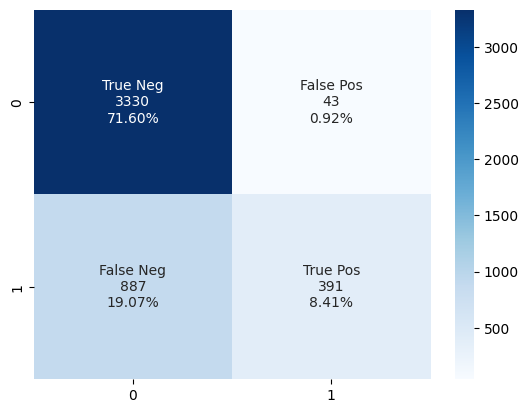

sensitivity : 0.3059467918622848, specificity : 0.9872517047139046, PPV : 0.9009216589861752, NPV : 0.7896608963718283




             STROKE             

       Random forest fit        
|--- PREVSTRK = 0.0 else  1.0
|---|--- AGE <= 55.0 
|---|---|--- SYSBP <= 136.0 
|---|---|---|--- CIGPDAY <= 2.0 else  0.0
|---|---|---|---|--- BMI <= 26.43 value 0.0
|---|---|---|---|---|--- DIABP <= 100.0 value 0.0 else 1.0
|---|---|---|--- TIME <= 2176.0 else  0.0
|---|---|---|---|--- HDLC <= 72.0 value 0.0
|---|---|---|---|---|--- SEX = 0.0 value 1.0 else 0.0
|---|---|--- SYSBP <= 164.0 value 0.0
|---|---|---|--- TIME <= 2165.0 
|---|---|---|---|--- DIABP <= 105.0 
|---|---|---|---|---|--- TIME <= 2157.0 value 0.0 else 1.0
|---|---|---|---|---|--- BMI <= 35.22 value 0.0 else 1.0
|---|---|---|---|--- SYSBP <= 207.0 
|---|---|---|---|---|--- HDLC <= 27.0 value 1.0 else 0.0
|---|---|---|---|---|--- TIME <= 4387.0 value 0.0 else 1.0

              Test              
accuracy ==> 0.9213072457536013


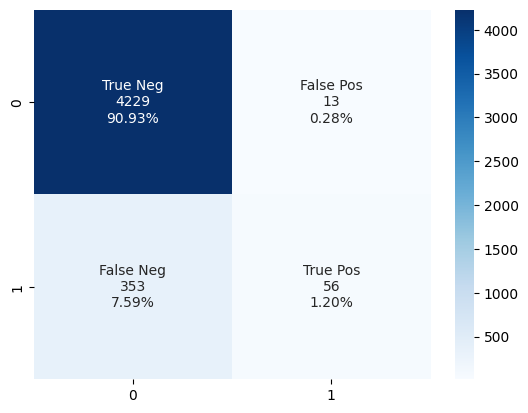

sensitivity : 0.13691931540342298, specificity : 0.9969354078264969, PPV : 0.8115942028985508, NPV : 0.922959406372763




              CVD               

       Random forest fit        
|--- PREVMI = 0.0 
|---|--- SYSBP <= 135.0 
|---|---|--- SEX = 0.0 
|---|---|---|--- PREVSTRK = 0.0 value 0.0 else 1.0
|---|---|---|--- AGE <= 54.0 
|---|---|---|---|--- TOTCHOL <= 208.0 else  0.0
|---|---|---|---|---|--- GLUCOSE <= 143.0 value 0.0 else 1.0
|---|---|---|---|--- TIME <= 2267.0 value 0.0
|---|---|---|---|---|--- PREVAP = 0.0 value 0.0 else 1.0
|---|---|--- PREVSTRK = 0.0 else  1.0
|---|---|---|--- SEX = 0.0 value 0.0
|---|---|---|---|--- AGE <= 53.0 value 0.0
|---|---|---|---|---|--- TIME <= 4157.0 value 1.0 else 0.0
|---|--- LDLC <= 196.0 value 1.0
|---|---|--- BMI <= 23.34 
|---|---|---|--- AGE <= 60.0 value 0.0
|---|---|---|---|--- SYSBP <= 167.0 value 1.0 else 0.0
|---|---|---|--- TIME <= 2083.0 else  1.0
|---|---|---|---|--- TOTCHOL = 226.0 value 0.0 else 1.0

              Test 

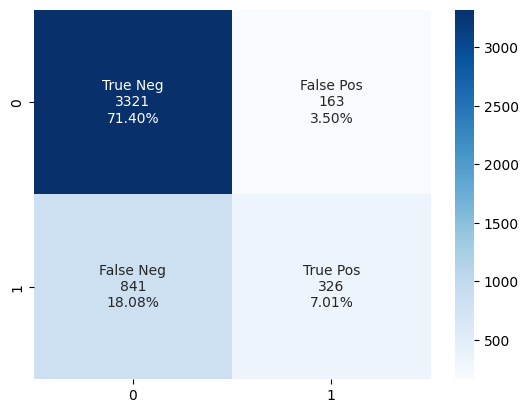

sensitivity : 0.27934875749785776, specificity : 0.9532146957520092, PPV : 0.6666666666666666, NPV : 0.7979336857280154




            HYPERTEN            

       Random forest fit        
|--- PREVHYP = 0.0 else  1.0
|---|--- SYSBP <= 121.0 
|---|---|--- SYSBP <= 113.0 
|---|---|---|--- TIME <= 1914.0 
|---|---|---|---|--- BMI <= 24.85 
|---|---|---|---|---|--- HDLC <= 69.0 value 0.0 else 1.0
|---|---|---|---|---|--- AGE <= 62.0 value 0.0 else 1.0
|---|---|---|---|--- GLUCOSE <= 128.0 value 0.0 else 1.0
|---|---|---|--- TIME <= 2238.0 
|---|---|---|---|--- SEX = 0.0 else  0.0
|---|---|---|---|---|--- LDLC <= 227.0 value 1.0 else 0.0
|---|---|---|---|--- SEX = 0.0 value 0.0
|---|---|---|---|---|--- HEARTRTE <= 90.0 value 0.0 else 1.0
|---|---|--- SYSBP <= 131.0 
|---|---|---|--- TIME <= 2309.0 value 1.0
|---|---|---|---|--- DIABP <= 87.0 else  1.0
|---|---|---|---|---|--- BMI <= 26.89 value 0.0 else 1.0
|---|---|---|--- TIME <= 4201.0 
|---|---|---|---|--- SYSBP <= 144.0 value 1.0
|-

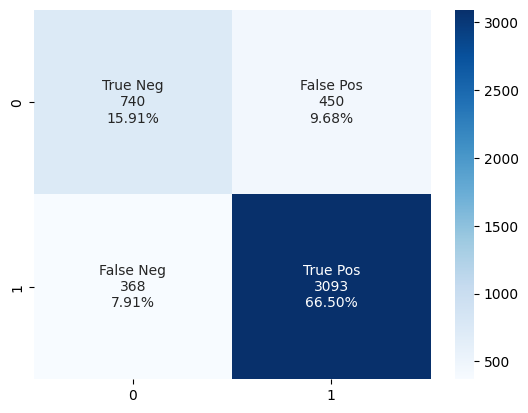

sensitivity : 0.8936723490320716, specificity : 0.6218487394957983, PPV : 0.8729889923793396, NPV : 0.6678700361010831




 Mean accuracy of all labels :   0.8429638787357557


In [14]:
fit_and_predict(data_path, save_directory, model_name="Decision Tree", max_depth=DEPTH, pretty_print=True)

# Evaluation on one human

In [16]:
# for i, column in enumerate(y_col_names):
#     print("\n\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
#     decision_trees[i].predict_one_element(X_test[0], display_evaluation_flow=True)